## Machine learning - Project

### Car Price Analysis
Problem Description: A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know: Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. Business Goal: You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

#### 1.Loading and Preprocessing

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\user\Desktop\CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
# cheching the missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No Null values present in the dataset

In [7]:
#Checking for duplicated values
df.duplicated().sum()

0

In [8]:
#finding skewness 
df.skew()

C:\Users\user\AppData\Local\Temp\ipykernel_38260\1325932328.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

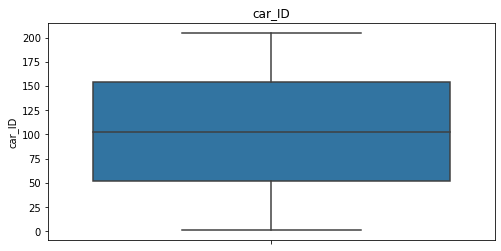

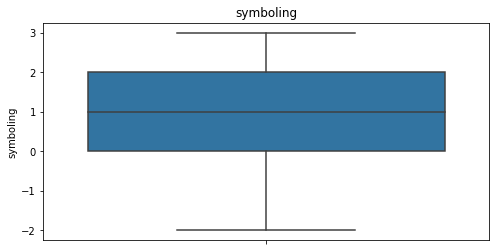

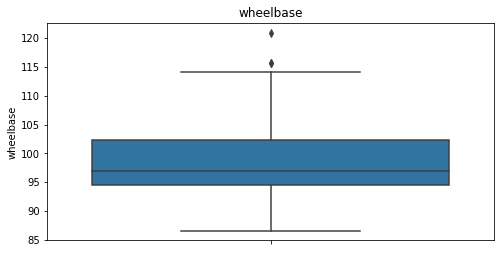

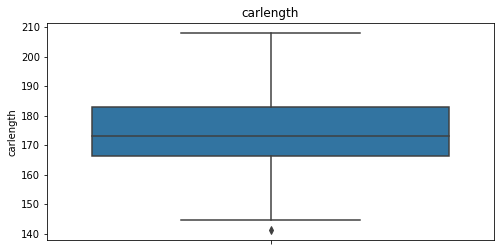

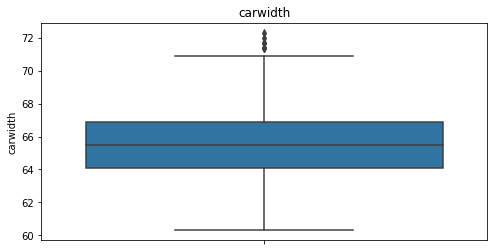

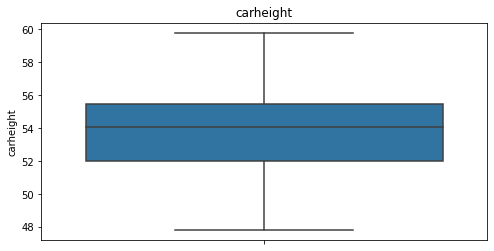

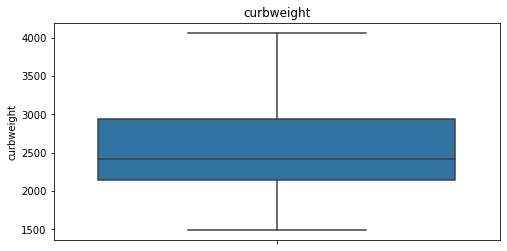

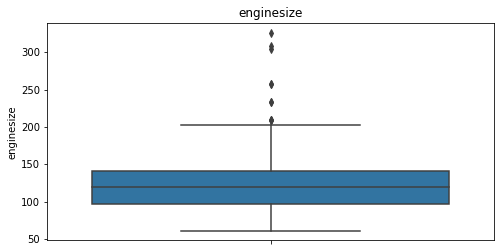

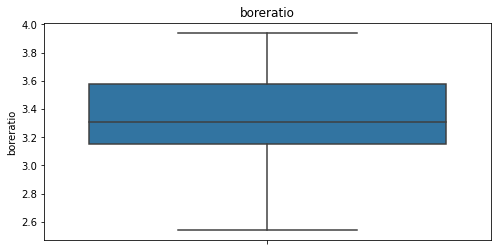

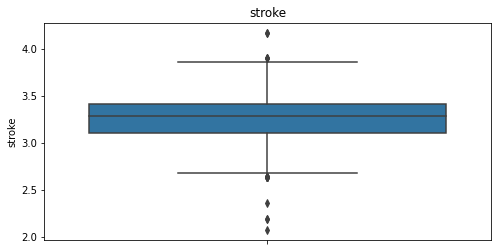

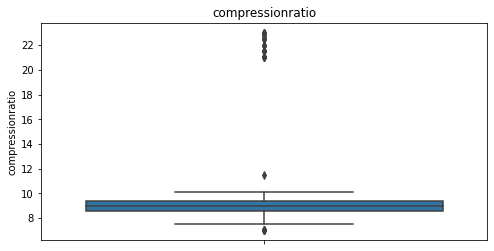

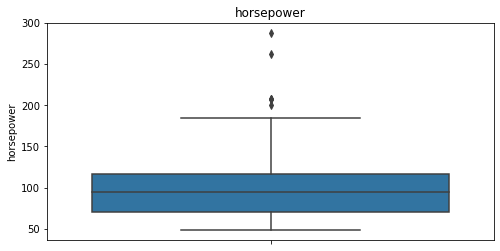

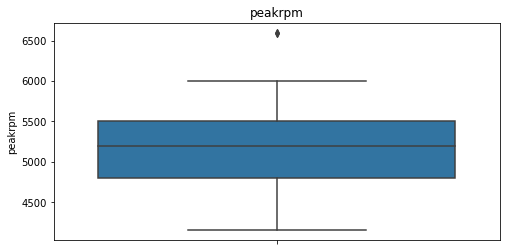

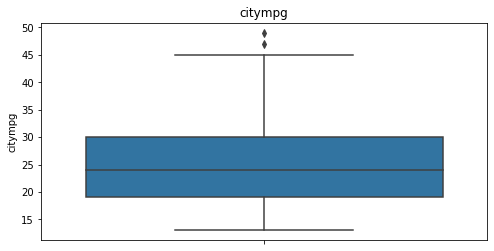

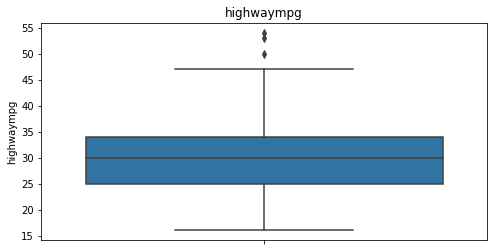

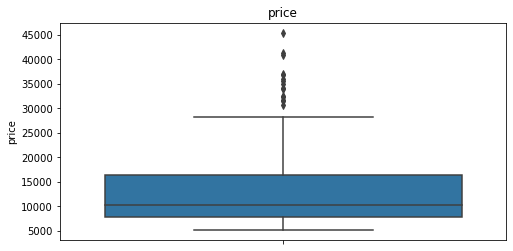

In [9]:
#Visualizing the data using boxplot for numerical columns
num = df.select_dtypes(include = ['float64','int64']).columns
for column in num:
    plt.figure(figsize=(8,4))
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.show()

From the boxplots obtained , some columns have outliers. Lets find and remove outliers using IQR method

In [10]:
#Finding outliers
def find_outliers_iqr(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column]<lower_bound) | (df[column]>upper_bound)]
    return outliers
for column in num:
    outliers = find_outliers_iqr(df,column)
    print("Outliers in ",column,":",outliers)

Outliers in  car_ID : Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]
Outliers in  symboling : Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]
Outliers in  wheelbase :     car_ID  symboling                  CarName fueltype aspiration doornumber  \
70      71         -1            buick skyhawk   diesel      turbo       four   
71      72         -1  buick opel isuzu deluxe      gas        s

In [11]:
#Capping outliers using IQR method:
def cap_outliers_iqr(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.25 * IQR
    upper_bound = Q3 + 1.25 * IQR
    df[column] = df[column].apply(lambda x:lower_bound if x<lower_bound 
                                  else upper_bound if x>upper_bound else x)

for column in num:
    cap_outliers_iqr(df,column)


In [12]:
#Checking skewness after outlier removal
df.skew()

C:\Users\user\AppData\Local\Temp\ipykernel_38260\2239498919.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


car_ID              0.000000
symboling           0.211072
wheelbase           0.803049
carlength           0.167375
carwidth            0.654919
carheight           0.063123
curbweight          0.637656
enginesize          0.781698
boreratio           0.047541
stroke             -0.348178
compressionratio   -0.079471
horsepower          0.705333
peakrpm            -0.026885
citympg             0.498959
highwaympg          0.245859
price               1.057888
dtype: float64

The data is still slightly skewed.Lets apply transformation

In [13]:
#Applying transformation
data_transformed = df.copy()
skewness = df.select_dtypes("number").skew()
for col in skewness.index:
    if skewness[col] > 0.5:      #positively skewed
        data_transformed[col] = np.log1p(df[col])
    elif skewness[col] >0.5:     #negatively skewed
        data_transformed[col] = np.square(df[col])
data_transformed.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [14]:
df = data_transformed

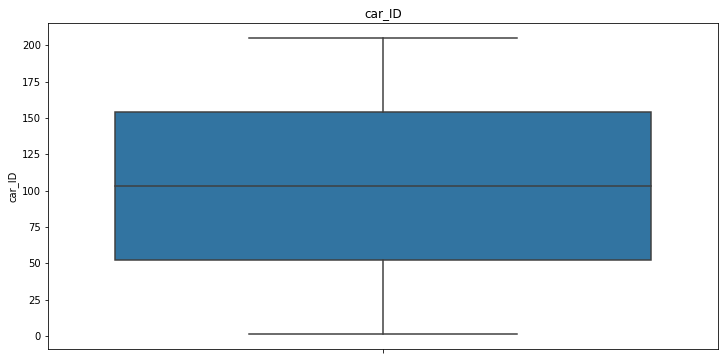

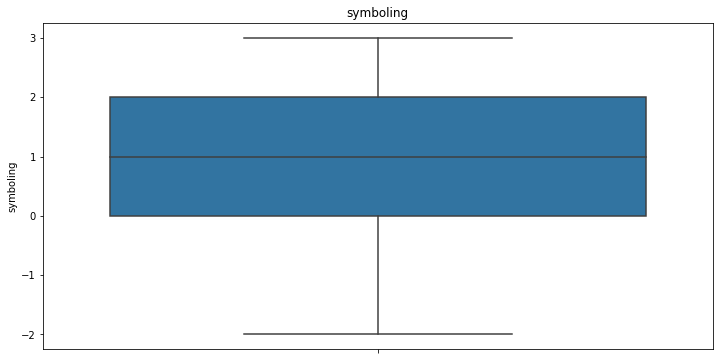

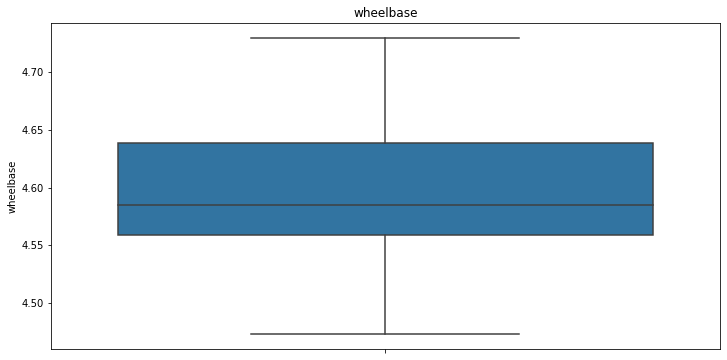

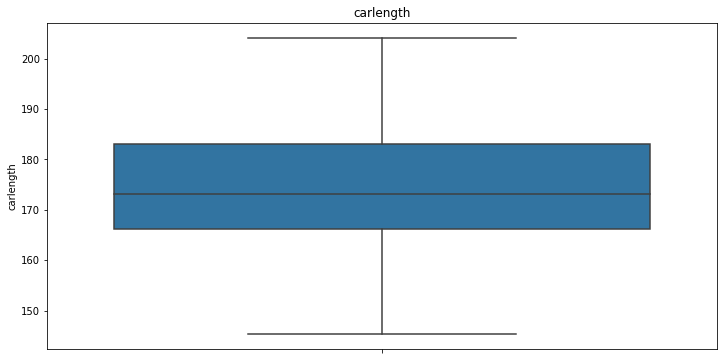

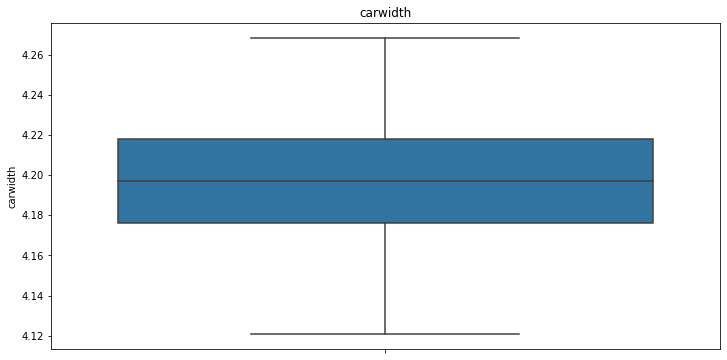

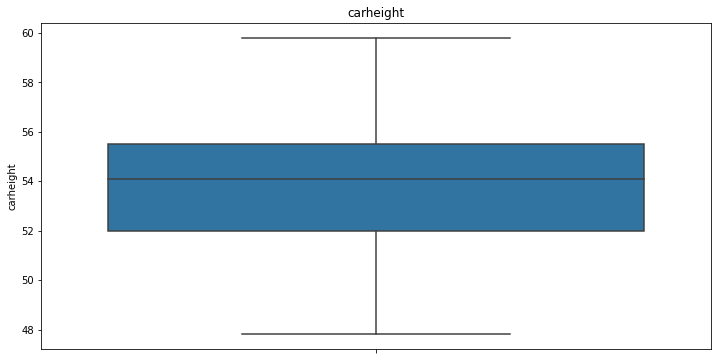

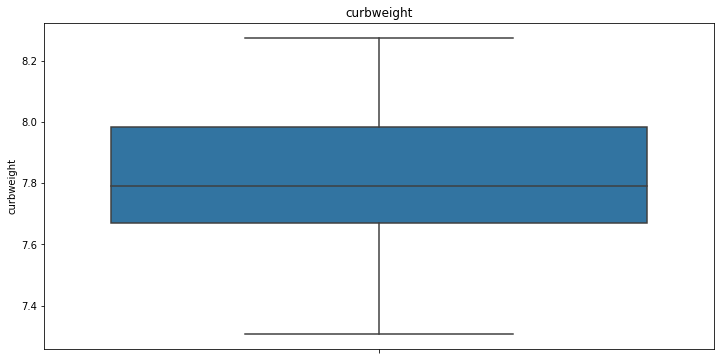

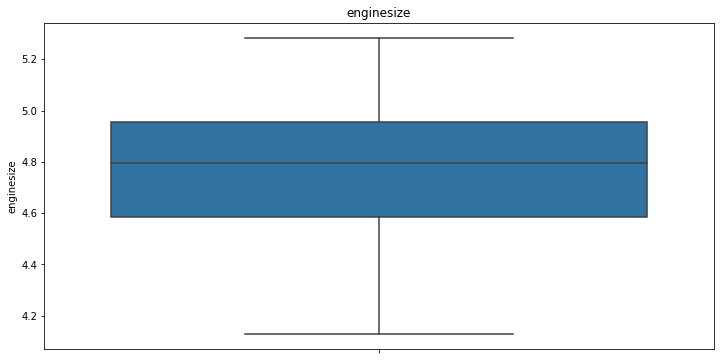

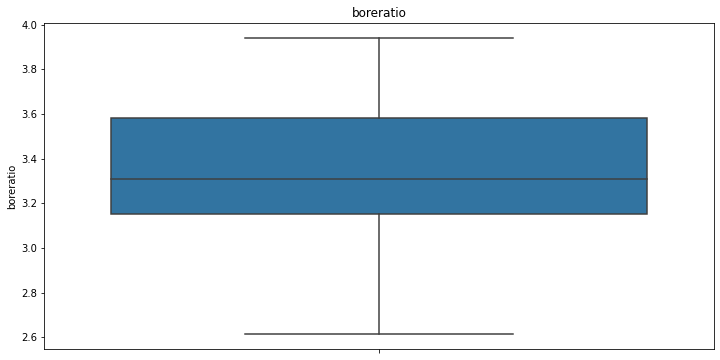

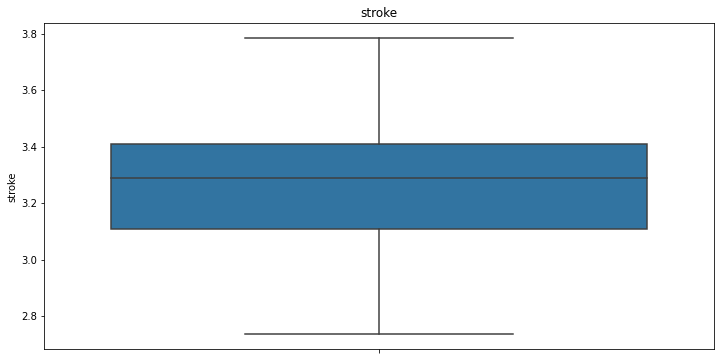

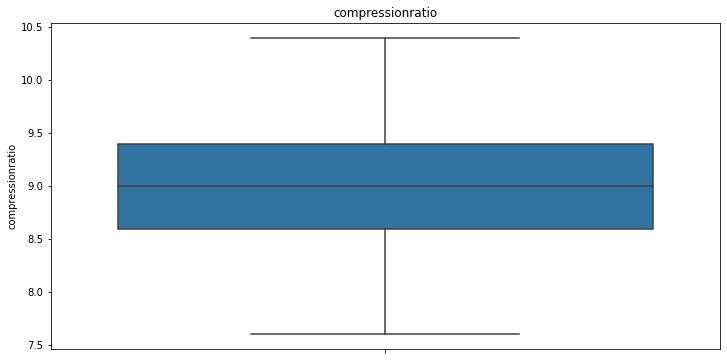

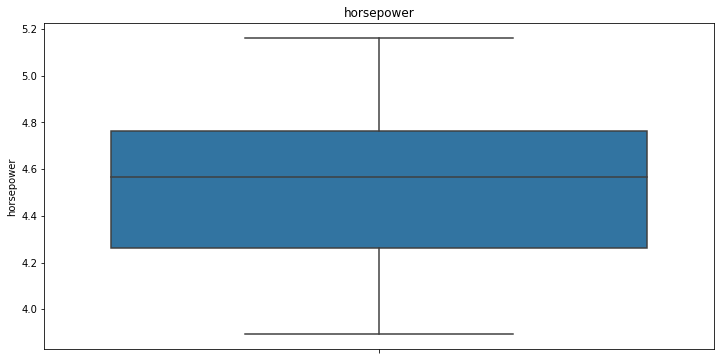

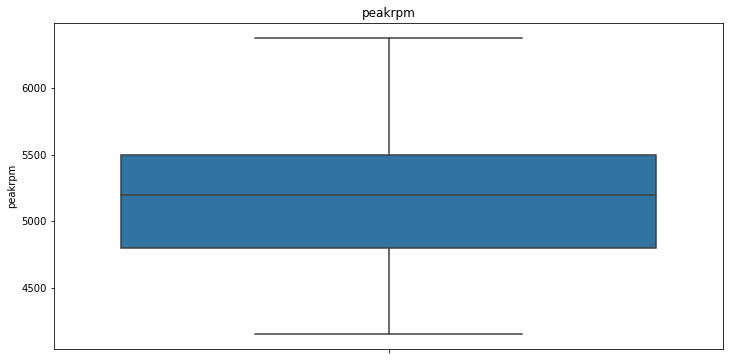

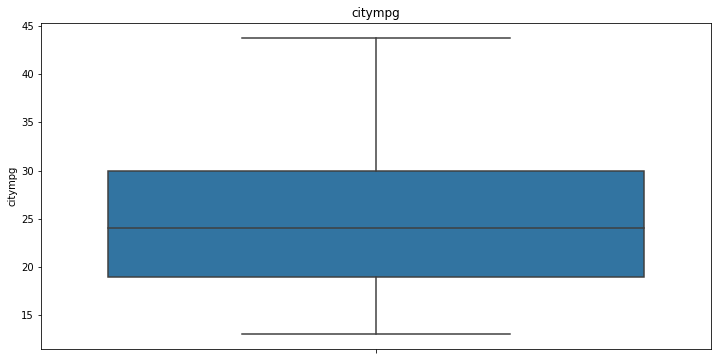

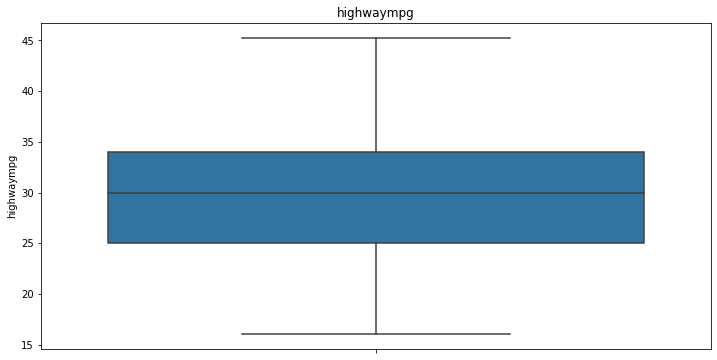

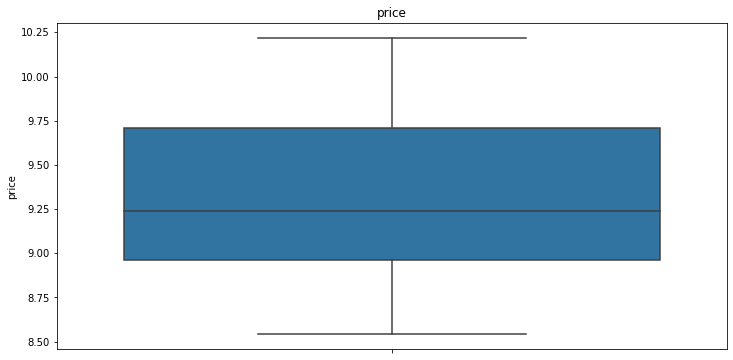

In [15]:
#Visualizing the data after removing outliers
for column in  num:
    plt.figure(figsize=(12,6))
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.show()

Almsot all outliers have been removed. Now the cleaned data can be used for encoding categorical values

In [16]:
#categorical values
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [17]:
#One - Hot encoding for categories
df = pd.get_dummies(df, columns=categorical_columns,drop_first=True)

In [18]:
list(df.columns)

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'CarName_alfa-romero Quadrifoglio',
 'CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 4000',
 'CarName_audi 5000',
 'CarName_audi 5000s (diesel)',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw x4',
 'CarName_bmw x5',
 'CarName_bmw z4',
 'CarName_buick century',
 'CarName_buick century luxus (sw)',
 'CarName_buick century special',
 'CarName_buick electra 225 custom',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skyhawk',
 'CarName_buick skylark',
 'CarName_chevrolet impala',
 'CarName_chevrolet monte carlo',
 'CarName_chevrolet vega 2300',
 'CarName_dodge challenger se',
 'CarName_dodge colt (sw)',

In [19]:
#Feature selection
x = df.drop(columns=[col for col in df.columns 
                     if col.startswith('CarName_')]+['price']+['car_ID'],axis=1)
y = df['price']

In [20]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [21]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [22]:
x_train.shape

(164, 43)

In [23]:
y_train.shape

(164,)

In [24]:
x_test.shape

(41, 43)

In [25]:
y_test.shape

(41,)

The preprocessing of data is completed. 
Steps done:
1. Loading the dataset and converting it to a dataframe. 
2. Finding out the information nd description of dataframe
3. Checking for null values and duplicated values
4. Visualizing the data columns seperately using boxplot
5. Finding out skewness of each column
6. Finding out outliers in numerical columns using IQR method
7. Removing the found outliers using IQR method
8. Done one-hot encoding for categorical features
9. Feture seclection and feature scaling done with standard scaler
10. Splitted the data into test data and train data

### 2. Model Implementation 

Implement the following five regression algorithms: 
1) Linear Regression 
2) Decision Tree Regressor 
3) Random Forest Regressor 
4) Gradient Boosting Regressor 
5) Support Vector Regressor 

#### 1.Linear Regression

In [26]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [27]:
#initializing an empty list to store results
results = []

In [28]:
#Linear regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [29]:
#Prediction on test data
lr_pred_test = lr_model.predict(x_test)
#Prediction on train data
lr_pred_train = lr_model.predict(x_train)

In [30]:
#Evaluating the model
#Calculating r2_score,mean_squared_error and mean_absolute_error for test data
lr_mse = mean_squared_error(y_test,lr_pred_test)
lr_mae = mean_absolute_error(y_test,lr_pred_test)
lr_r2 = r2_score(y_test,lr_pred_test)
#calculating r2-score for training data
lr_r2_train = r2_score(y_train,lr_pred_train)

In [31]:
#appending results to the list
results.append({
    'Model': 'Linear Regression',
    'Mean Squared Error': lr_mse,
    'Mean Absolute Error': lr_mae,
    'R2 Score (Test)': lr_r2,
    'R2 Score (Train)': lr_r2_train
})
print(results)


[{'Model': 'Linear Regression', 'Mean Squared Error': 0.024603103705596516, 'Mean Absolute Error': 0.12589910836073173, 'R2 Score (Test)': 0.8884773762128266, 'R2 Score (Train)': 0.9387177537471362}]


#### 2.Decision Tree Regressor

In [32]:
#importing libraries
from sklearn.tree import DecisionTreeRegressor
#Decision tree regression
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [33]:
#Prediction on test data
dt_pred_test = dt_model.predict(x_test)
#Prediction on train data
dt_pred_train = dt_model.predict(x_train)

In [34]:
#Evaluating the model
#Calculating r2_score,mean_squared_error and mean_absolute_error for test data
dt_mse = mean_squared_error(y_test,dt_pred_test)
dt_mae = mean_absolute_error(y_test,dt_pred_test)
dt_r2 = r2_score(y_test,dt_pred_test)
#calculating r2-score for training data
dt_r2_train = r2_score(y_train,dt_pred_train)


In [35]:
#appending results to the list
results.append({
    'Model': 'Decision Tree Regressor',
    'Mean Squared Error': dt_mse,
    'Mean Absolute Error': dt_mae,
    'R2 Score (Test)': dt_r2,
    'R2 Score (Train)': dt_r2_train
})
print(results)

[{'Model': 'Linear Regression', 'Mean Squared Error': 0.024603103705596516, 'Mean Absolute Error': 0.12589910836073173, 'R2 Score (Test)': 0.8884773762128266, 'R2 Score (Train)': 0.9387177537471362}, {'Model': 'Decision Tree Regressor', 'Mean Squared Error': 0.022054123011452043, 'Mean Absolute Error': 0.10164219434259267, 'R2 Score (Test)': 0.9000315694721583, 'R2 Score (Train)': 0.9988958319059426}]


####  3.Random Forest Regressor

In [36]:
#importing libraries
from sklearn.ensemble import RandomForestRegressor
#Random Forest regression
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
#Prediction on test data
rf_pred_test = rf_model.predict(x_test)
#Prediction on train data
rf_pred_train = rf_model.predict(x_train)

In [38]:
#Evaluating the model
#Calculating r2_score,mean_squared_error and mean_absolute_error for test data
rf_mse = mean_squared_error(y_test,rf_pred_test)
rf_mae = mean_absolute_error(y_test,rf_pred_test)
rf_r2 = r2_score(y_test,rf_pred_test)
#calculating r2-score for training data
rf_r2_train = r2_score(y_train,rf_pred_train)


In [39]:
#appending results to the list
results.append({
    'Model': 'Random Forest Regressor',
    'Mean Squared Error': rf_mse,
    'Mean Absolute Error': rf_mae,
    'R2 Score (Test)': rf_r2,
    'R2 Score (Train)': rf_r2_train
})
print(results)

[{'Model': 'Linear Regression', 'Mean Squared Error': 0.024603103705596516, 'Mean Absolute Error': 0.12589910836073173, 'R2 Score (Test)': 0.8884773762128266, 'R2 Score (Train)': 0.9387177537471362}, {'Model': 'Decision Tree Regressor', 'Mean Squared Error': 0.022054123011452043, 'Mean Absolute Error': 0.10164219434259267, 'R2 Score (Test)': 0.9000315694721583, 'R2 Score (Train)': 0.9988958319059426}, {'Model': 'Random Forest Regressor', 'Mean Squared Error': 0.01283148589467574, 'Mean Absolute Error': 0.09052545027681932, 'R2 Score (Test)': 0.9418365669963489, 'R2 Score (Train)': 0.984927386114267}]


#### 4.Gradient Boosting Regressor 

In [40]:
#importing libraries
from sklearn.ensemble import GradientBoostingRegressor
#Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [41]:
#Prediction on test data
gb_pred_test = gb_model.predict(x_test)
#Prediction on train data
gb_pred_train = gb_model.predict(x_train)

In [42]:
#Evaluating the model
#Calculating r2_score,mean_squared_error and mean_absolute_error for test data
gb_mse = mean_squared_error(y_test,gb_pred_test)
gb_mae = mean_absolute_error(y_test,gb_pred_test)
gb_r2 = r2_score(y_test,gb_pred_test)
#calculating r2-score for training data
gb_r2_train = r2_score(y_train,gb_pred_train)

In [43]:
#appending results to the list
results.append({
    'Model': 'Gradient Boosting Regressor',
    'Mean Squared Error': gb_mse,
    'Mean Absolute Error': gb_mae,
    'R2 Score (Test)': gb_r2,
    'R2 Score (Train)': gb_r2_train
})
print(results)

[{'Model': 'Linear Regression', 'Mean Squared Error': 0.024603103705596516, 'Mean Absolute Error': 0.12589910836073173, 'R2 Score (Test)': 0.8884773762128266, 'R2 Score (Train)': 0.9387177537471362}, {'Model': 'Decision Tree Regressor', 'Mean Squared Error': 0.022054123011452043, 'Mean Absolute Error': 0.10164219434259267, 'R2 Score (Test)': 0.9000315694721583, 'R2 Score (Train)': 0.9988958319059426}, {'Model': 'Random Forest Regressor', 'Mean Squared Error': 0.01283148589467574, 'Mean Absolute Error': 0.09052545027681932, 'R2 Score (Test)': 0.9418365669963489, 'R2 Score (Train)': 0.984927386114267}, {'Model': 'Gradient Boosting Regressor', 'Mean Squared Error': 0.014376361716697726, 'Mean Absolute Error': 0.10009155445592555, 'R2 Score (Test)': 0.9348338486743484, 'R2 Score (Train)': 0.9901636497290983}]


####  5.Support Vector Regressor 

In [44]:
#importing libraries
from sklearn.svm import SVR
#Support Vector Regression
svr_model =SVR()
svr_model.fit(x_train,y_train)

SVR()

In [45]:
#Prediction on test data
svr_pred_test = svr_model.predict(x_test)
#Prediction on train data
svr_pred_train = svr_model.predict(x_train)

In [46]:
#Evaluating the model
#Calculating r2_score,mean_squared_error and mean_absolute_error for test data
svr_mse = mean_squared_error(y_test,svr_pred_test)
svr_mae = mean_absolute_error(y_test,svr_pred_test)
svr_r2 = r2_score(y_test,svr_pred_test)
#calculating r2-score for training data
svr_r2_train = r2_score(y_train,svr_pred_train)

In [47]:
#appending results to the list
results.append({
    'Model': 'Support Vector Regressor',
    'Mean Squared Error': svr_mse,
    'Mean Absolute Error': svr_mae,
    'R2 Score (Test)': svr_r2,
    'R2 Score (Train)': svr_r2_train
})
print(results)

[{'Model': 'Linear Regression', 'Mean Squared Error': 0.024603103705596516, 'Mean Absolute Error': 0.12589910836073173, 'R2 Score (Test)': 0.8884773762128266, 'R2 Score (Train)': 0.9387177537471362}, {'Model': 'Decision Tree Regressor', 'Mean Squared Error': 0.022054123011452043, 'Mean Absolute Error': 0.10164219434259267, 'R2 Score (Test)': 0.9000315694721583, 'R2 Score (Train)': 0.9988958319059426}, {'Model': 'Random Forest Regressor', 'Mean Squared Error': 0.01283148589467574, 'Mean Absolute Error': 0.09052545027681932, 'R2 Score (Test)': 0.9418365669963489, 'R2 Score (Train)': 0.984927386114267}, {'Model': 'Gradient Boosting Regressor', 'Mean Squared Error': 0.014376361716697726, 'Mean Absolute Error': 0.10009155445592555, 'R2 Score (Test)': 0.9348338486743484, 'R2 Score (Train)': 0.9901636497290983}, {'Model': 'Support Vector Regressor', 'Mean Squared Error': 0.05089537391874775, 'Mean Absolute Error': 0.14037809089161005, 'R2 Score (Test)': 0.7692979834590181, 'R2 Score (Train)':

### 3. Model Evaluation 
Compare the performance of all the models based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE). 
Identify the best performing model and justify why it is the best.

In [48]:
#creating a dataframe to display the results for detailed evalutaion of performances of all models
results_df = pd.DataFrame(results)
results_df

,Model,Mean Squared Error,Mean Absolute Error,R2 Score (Test),R2 Score (Train)
0,Linear Regression,0.024603,0.125899,0.888477,0.938718
1,Decision Tree Regressor,0.022054,0.101642,0.900032,0.998896
2,Random Forest Regressor,0.012831,0.090525,0.941837,0.984927
3,Gradient Boosting Regressor,0.014376,0.100092,0.934834,0.990164
4,Support Vector Regressor,0.050895,0.140378,0.769298,0.956713


In [49]:
results_df = results_df.sort_values(by="R2 Score (Test)",ascending=False)
results_df

,Model,Mean Squared Error,Mean Absolute Error,R2 Score (Test),R2 Score (Train)
2,Random Forest Regressor,0.012831,0.090525,0.941837,0.984927
3,Gradient Boosting Regressor,0.014376,0.100092,0.934834,0.990164
1,Decision Tree Regressor,0.022054,0.101642,0.900032,0.998896
0,Linear Regression,0.024603,0.125899,0.888477,0.938718
4,Support Vector Regressor,0.050895,0.140378,0.769298,0.956713


Analysis of model performance:

From the table, we can compare the performance of different regression models using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² scores.


##### 1. Best Model: Random Forest Regressor

Lowest MSE (0.012831) and MAE (0.090525) → Indicates the best predictive accuracy.

Highest R² Score on Test Data (0.941837) → Suggests it generalizes well.

High R² on Train Data (0.984927) → Some risk of overfitting, but still robust.



##### 2. Gradient Boosting Regressor (2nd Best)

MSE (0.014376) and MAE (0.100092) are slightly higher than Random Forest.

Test R² (0.934834) is close to Random Forest but has a higher train R² (0.990164) → Slight overfitting.



##### 3. Decision Tree Regressor

Higher MSE (0.022054) and MAE (0.101642) than ensemble models.

Lower Test R² (0.900032), but very high Train R² (0.998896) → Strong signs of overfitting.



##### 4. Linear Regression

MSE (0.024603) and MAE (0.125899) are moderate.

Test R² (0.888477) is lower than tree-based models, indicating less predictive power.

Train R² (0.938718) shows a decent fit, but not as good as Random Forest or Gradient Boosting.



##### 5. Worst Model: Support Vector Regressor

Highest MSE (0.050895) and MAE (0.140378) → Least accurate model.

Lowest Test R² (0.769298) despite a high Train R² (0.956713) → Overfitting with poor generalization.




Final Conclusion:

Random Forest Regressor is the best-performing model, providing the lowest error and highest R² on test data.

Gradient Boosting is a close second, but slightly more prone to overfitting.

Decision Tree has strong overfitting issues.

Linear Regression is decent but not as effective as tree-based models.

Support Vector Regressor performs the worst in terms of both error and R² score.


Recommendation:

Use Random Forest Regressor for the best balance of accuracy and generalization.

If computational efficiency is a concern, Gradient Boosting is a good alternative.

Avoid Support Vector Regressor due to poor generalization.






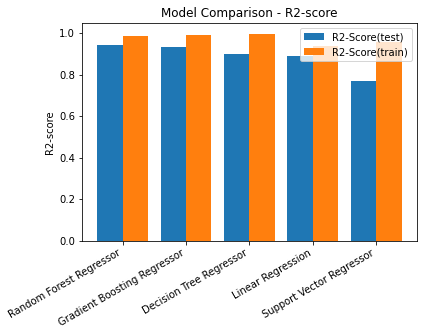

In [51]:
#Plotting the evaluation using bar plot
models = results_df['Model'].tolist()
R2_score_test = results_df['R2 Score (Test)'].tolist()
R2_score_train = results_df['R2 Score (Train)'].tolist()
a = np.arange(len(models))
plt.bar(a-0.2 ,R2_score_test,0.4,label = "R2-Score(test)")
plt.bar(a+0.2 ,R2_score_train,0.4,label = "R2-Score(train)")
plt.ylabel("R2-score")
plt.xticks(a,models,rotation = 30,ha = 'right')
plt.title("Model Comparison - R2-score")
plt.legend()
plt.show()

### 4. Feature Importance Analysis 

Identifying the significant variables affecting car prices (feature selection)
Since Random Forest Regressor got best results, extractying feature importance from that model.


In [54]:
from sklearn.feature_selection import SelectFromModel
feature_importance = rf_model.feature_importances_
#Creating a dataframe
feature_importance_df = pd.DataFrame({'Feature' : x.columns, 
                                      'Importance' : feature_importance
                                     }).sort_values(by='Importance',ascending=False)
#Displaying the top features
feature_importance_df


,Feature,Importance
5,curbweight,5.906479e-01
13,highwaympg,1.799044e-01
6,enginesize,8.189305e-02
10,horsepower,4.606887e-02
3,carwidth,1.849837e-02
2,carlength,1.586045e-02
1,wheelbase,1.141507e-02
12,citympg,1.126309e-02
11,peakrpm,6.565897e-03
8,stroke,5.425843e-03


From the feature importance results, 
Feature 	Importance
curbweight	5.906479e-01
highwaympg	1.799044e-01
enginesize	8.189305e-02
horsepower	4.606887e-02
carwidth	1.849837e-02
These features can consider as the most important factors affecting car price.

### 5.Hyperparameter Tuning

In [55]:
#performing hyper parameter tuning to performances of model, to find the best hyperparametres.
from sklearn.model_selection import GridSearchCV
#Defining the parameter grid:
param_grid = {'n_estimators': [50,100, 200],
             'max_depth': [10,20,None],
             'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1,2,4]
             }
#Initializing the model:
rf_model = RandomForestRegressor(random_state=42)
#Performing grid search:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(x_train, y_train)
#Best parameters:
print("Best Parameters:", grid_search.best_params_)
#Evaluating on the test data:
best_rfmodel = grid_search.best_estimator_
y_pred_tuned = best_rfmodel.predict(x_test)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [56]:
#evaluating tuned model - Gradient Boosting Regressor
y_pred_tuned = best_gbmodel.predict(x_test)
r2_tuned = r2_score(y_test,y_pred_tuned)
mae_tuned = mean_absolute_error(y_test,y_pred_tuned)
mse_tuned = mean_squared_error(y_test,y_pred_tuned)
print("Tuned model R2-Score: ",r2_tuned)
print("tuned model MAE: ",mae_tuned)
print("Tuned model MSE: ",mse_tuned)


Tuned model R2-Score:  0.9353371903665024
tuned model MAE:  0.0954389285173897
Tuned model MSE:  0.014265319065163205
